<a href="https://colab.research.google.com/github/AnshumanSamanta/five-class-heart-disease-detection-by-analysing-pcg-data/blob/main/heart_disease_try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import zipfile

# Replace with the actual path to your zip file
zip_path = Path("/content/training_dataset.zip")  # Adjust the path as needed

# Create a directory to store the extracted files (optional)
extract_dir = zip_path.with_name(zip_path.stem)  # Remove ".zip" extension
extract_dir.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

print("Files extracted successfully!")

Files extracted successfully!


In [ ]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [ ]:
normal_file="./training_dataset/N_New/New_N_001.wav"

In [ ]:
# heart it
import IPython.display as ipd
ipd.Audio(normal_file)

In [ ]:
# Load use wave
import wave
wav = wave.open(normal_file)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

Sampling (frame) rate =  8000
Total samples (frames) =  16837
Duration =  2.104625


In [ ]:
# Load use scipy
from scipy.io import wavfile
rate, data = wavfile.read(normal_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)


Sampling (frame) rate =  8000
Total samples (frames) =  (16837,)
[  1  -5 -10 ...   2   0  -7]


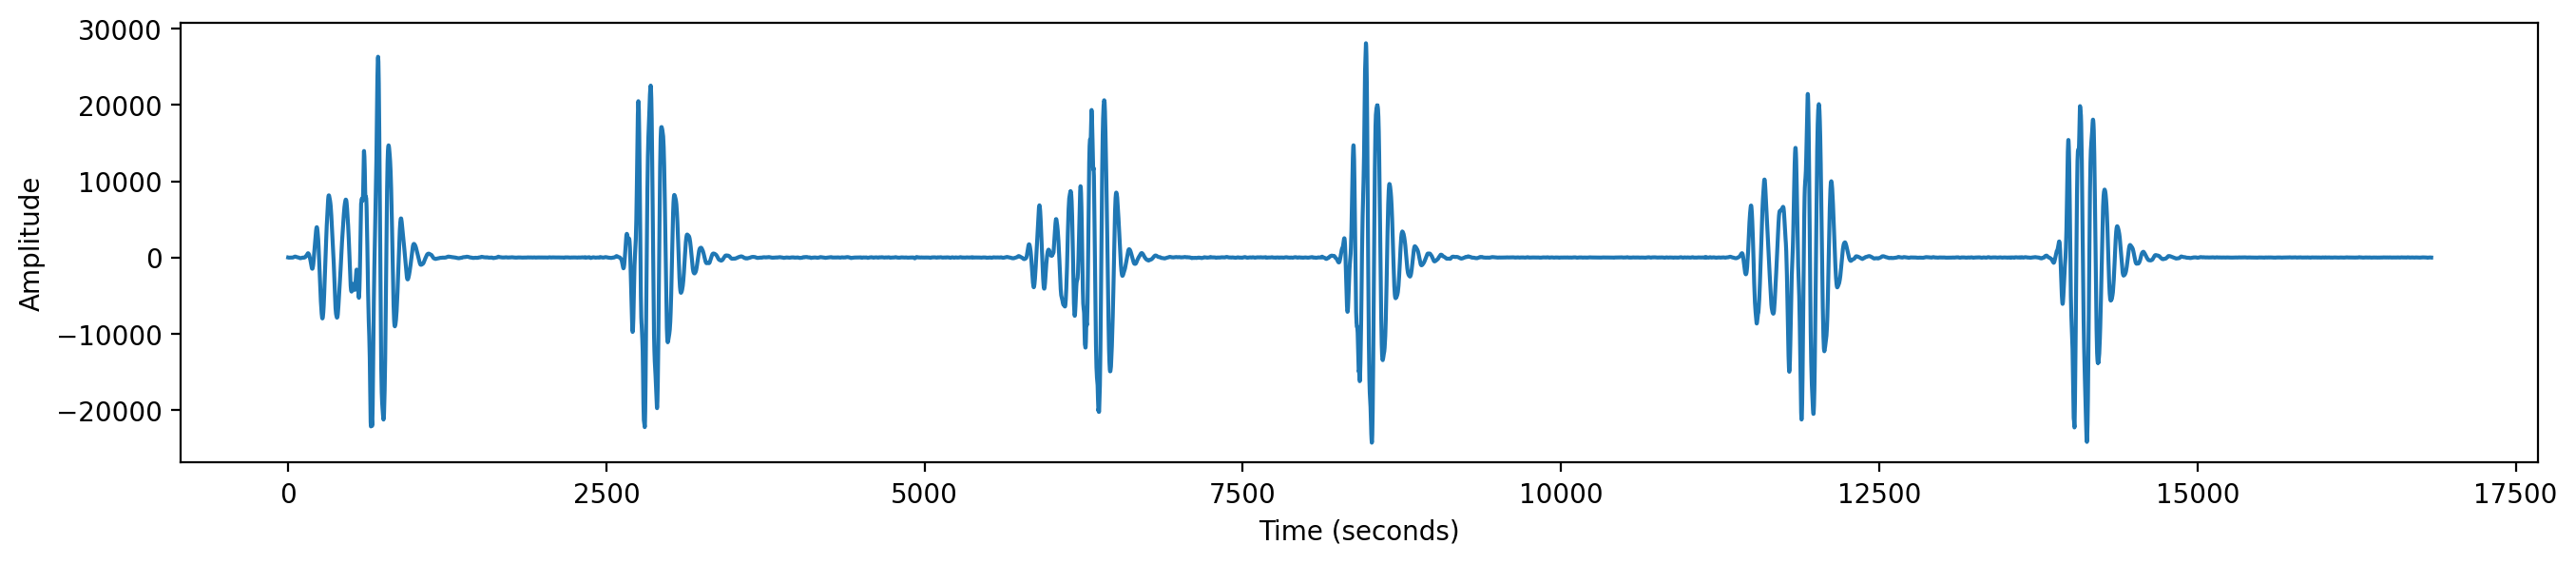

In [ ]:
# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.plot(data, '-', );

In [ ]:
# Load using Librosa
y, sr = librosa.load(normal_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y.shape, sr)

duration: 2.104625850340136
(46407,) 22050


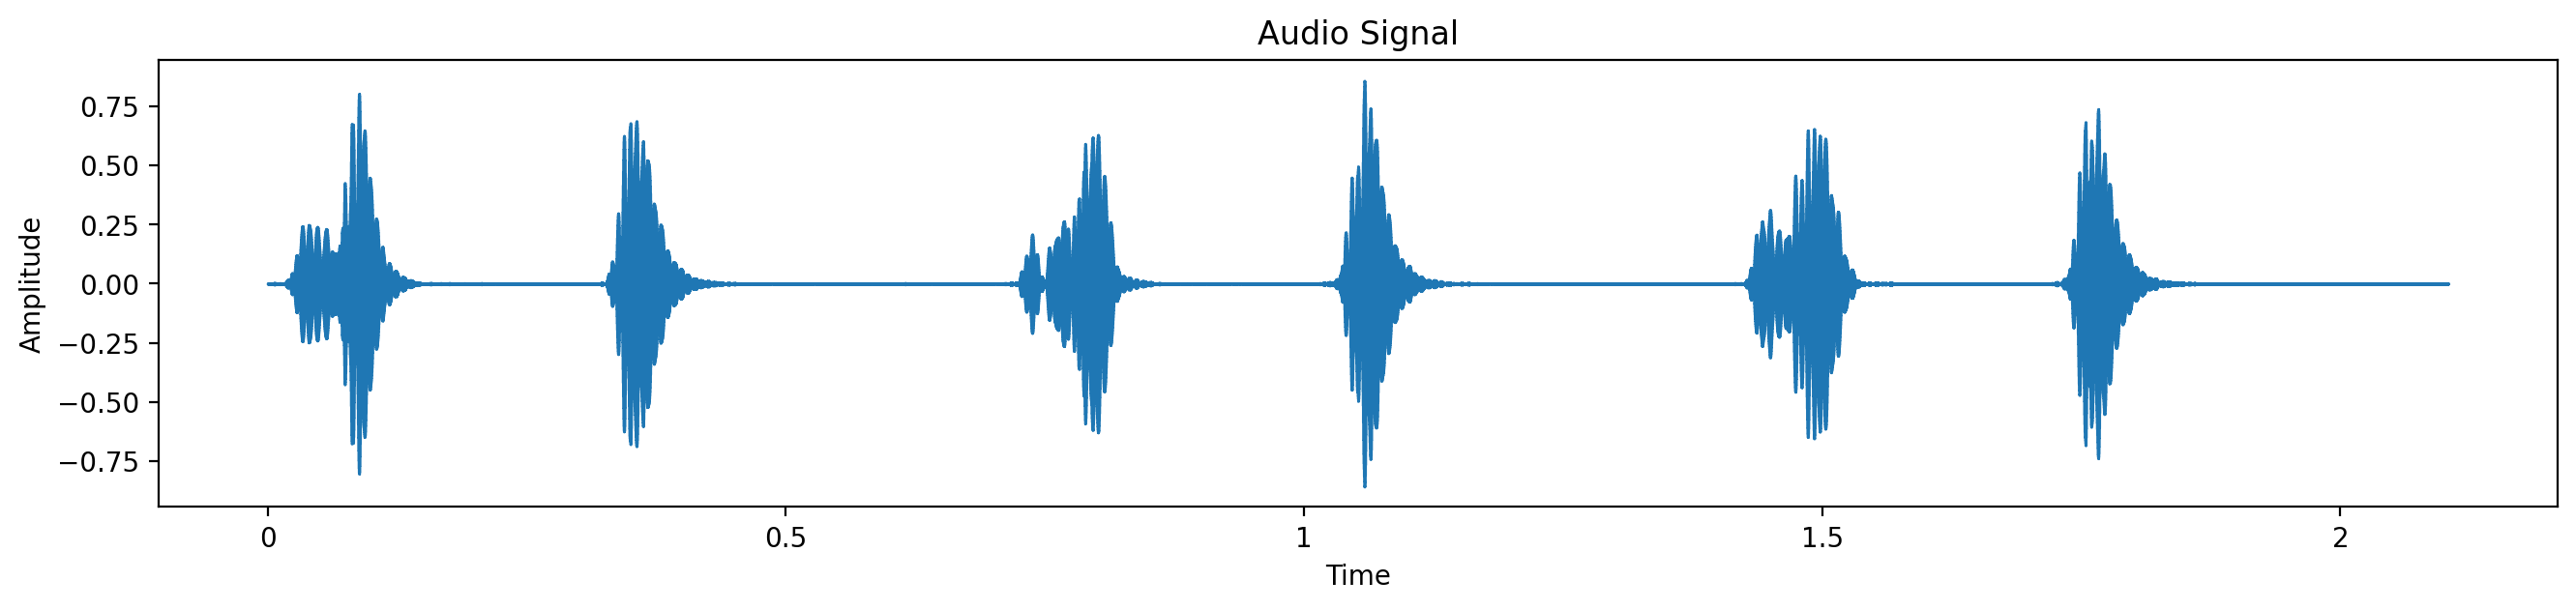

In [ ]:
# librosa plot
plt.figure(figsize=(16, 3))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

plt.title("Audio Signal")
librosa.display.waveshow(y, sr=sr)

In [ ]:
#murmur

murmur_file="./training_dataset/MR_New/New_MR_001.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 2.104625850340136
(46292,) 22050


In [ ]:
# heart it
import IPython.display as ipd
ipd.Audio(murmur_file)

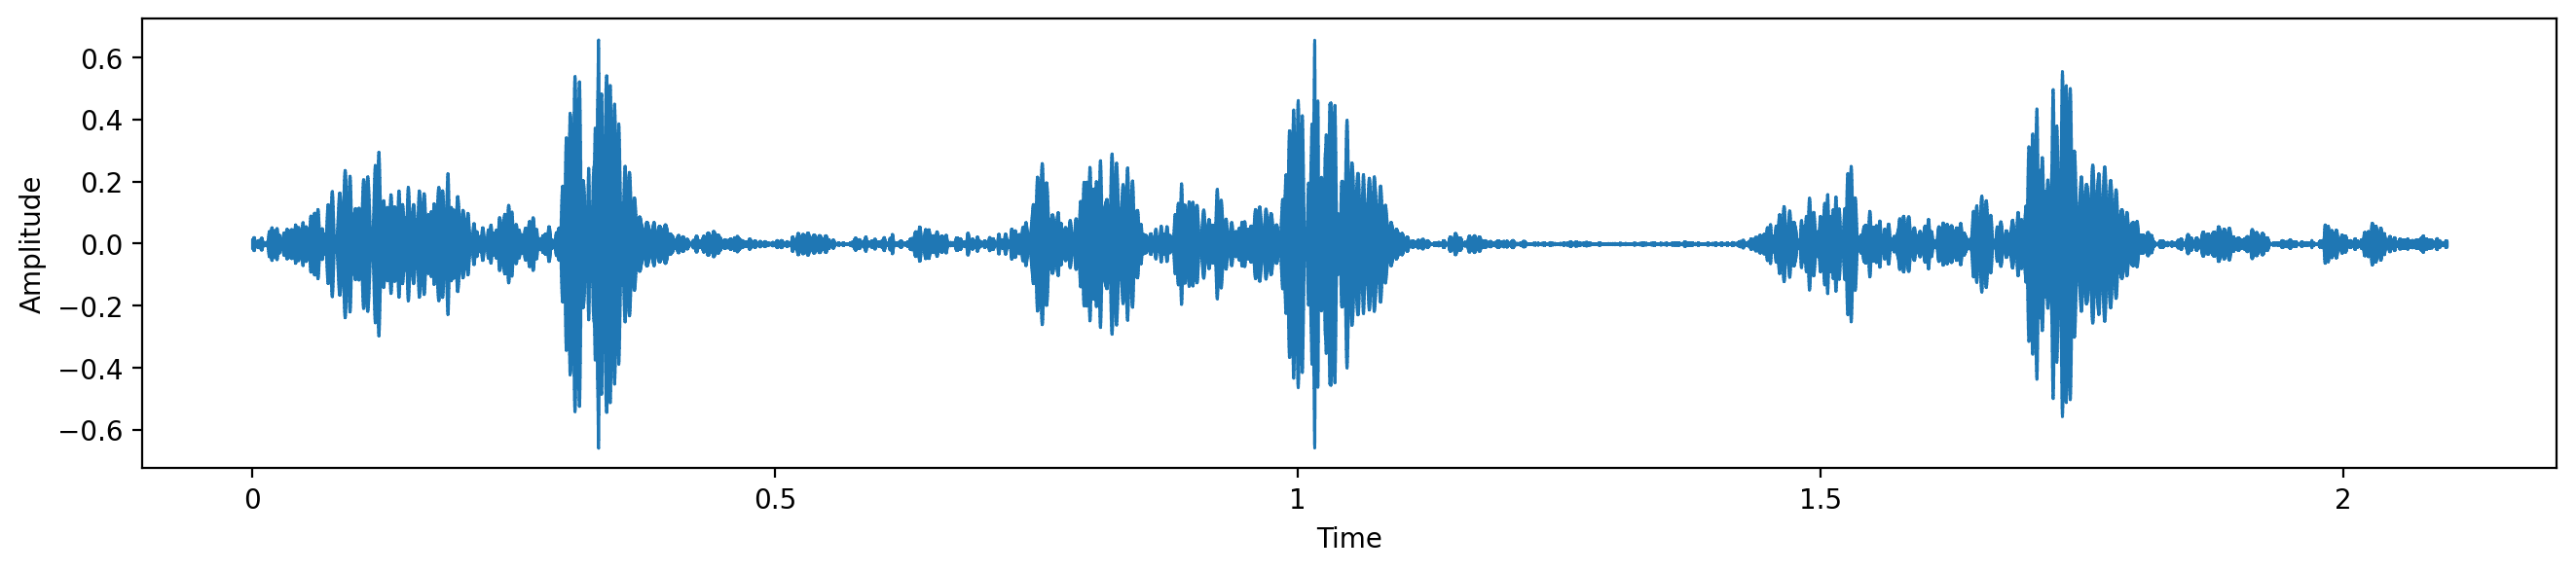

In [ ]:
# show it
plt.figure(figsize=(16, 3))
plt.ylabel("Amplitude")
librosa.display.waveshow(y2, sr=sr2)

In [ ]:
# Here's a sample generate mfccs from a wave file
# normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"
#y, sr = librosa.load(sample_file, offset=7, duration=7)
y, sr = librosa.load(normal_file)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print (mfccs)

[[-4.6865134e+02 -4.3950186e+02 -3.7523340e+02 ... -5.0012888e+02
  -5.0217212e+02 -5.0232974e+02]
 [ 5.5943855e+01  9.3963753e+01  1.4903415e+02 ...  1.2303814e+01
   9.3253078e+00  9.2395496e+00]
 [ 5.2495220e+01  8.1966766e+01  8.3899055e+01 ...  1.1366940e+01
   8.1681509e+00  8.4633017e+00]
 ...
 [ 5.4477072e+00  5.2322640e+00  8.3561487e+00 ...  7.6243085e-01
  -2.1134024e+00 -3.9280291e+00]
 [ 4.3544035e+00  5.7153177e+00  8.6536350e+00 ...  4.0007412e-01
  -1.6157756e+00 -3.5807714e+00]
 [ 3.0793586e+00  6.3528280e+00  6.0013337e+00 ... -4.7402784e-02
  -8.9761865e-01 -2.9551632e+00]]


In [ ]:
# Use a pre-computed log-power Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
log_S=librosa.feature.mfcc(S=librosa.power_to_db(S))
print (log_S)

[[-4.71728485e+02 -4.38816376e+02 -3.64054688e+02 ... -5.06974182e+02
  -5.08795593e+02 -5.09510834e+02]
 [ 6.41767426e+01  1.05785126e+02  1.59045761e+02 ...  1.56393147e+01
   1.28229933e+01  1.20771542e+01]
 [ 5.88912849e+01  8.83275909e+01  7.98717651e+01 ...  1.40326118e+01
   1.06227512e+01  1.06017113e+01]
 ...
 [ 3.61162996e+00  6.82169533e+00  7.35699844e+00 ... -7.76113421e-02
  -1.13932216e+00 -3.57907343e+00]
 [ 2.10257244e+00  7.35133076e+00  6.34492493e+00 ... -7.04658031e-01
   8.86809230e-02 -2.39075470e+00]
 [ 4.90507156e-01  5.64667511e+00  4.64278698e+00 ... -1.20908070e+00
   1.16644859e+00 -1.36952734e+00]]


In [ ]:
# Get more components
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
print (mfccs)

[[-4.6865134e+02 -4.3950186e+02 -3.7523340e+02 ... -5.0012888e+02
  -5.0217212e+02 -5.0232974e+02]
 [ 5.5943855e+01  9.3963753e+01  1.4903415e+02 ...  1.2303814e+01
   9.3253078e+00  9.2395496e+00]
 [ 5.2495220e+01  8.1966766e+01  8.3899055e+01 ...  1.1366940e+01
   8.1681509e+00  8.4633017e+00]
 ...
 [-4.2686377e+00 -3.4618797e+00 -3.4668508e-01 ...  7.0211482e-01
   1.6451323e-01 -1.3957046e+00]
 [-3.2112722e+00 -2.2861242e+00 -2.0677075e+00 ...  7.7912283e-01
   1.9217777e-01 -1.5364592e+00]
 [-2.2773805e+00 -1.2799034e+00 -2.3428795e+00 ...  8.2392716e-01
   3.9493918e-01 -1.4664936e+00]]


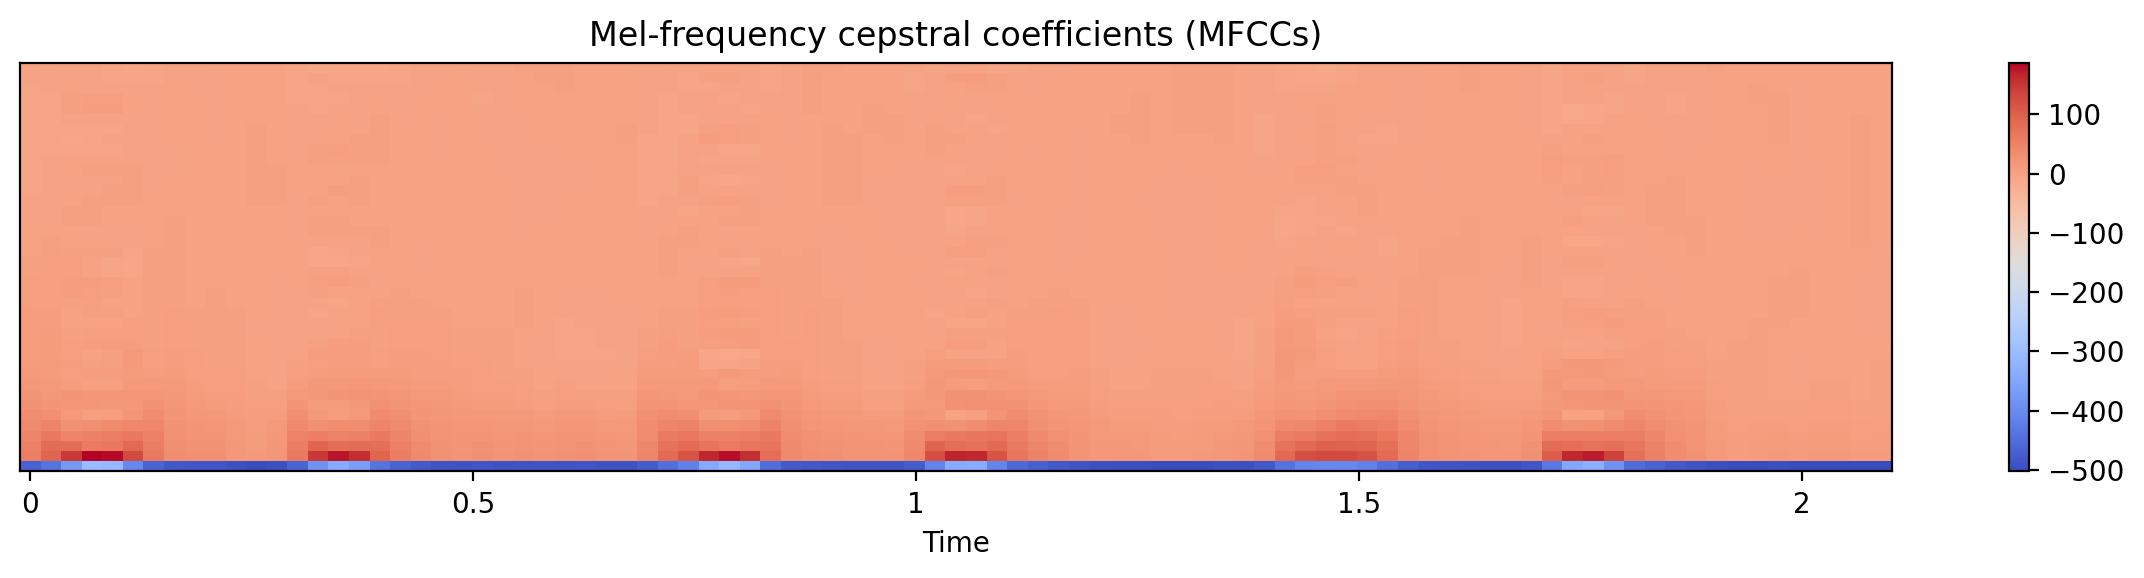

In [ ]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients (MFCCs)')
plt.tight_layout()

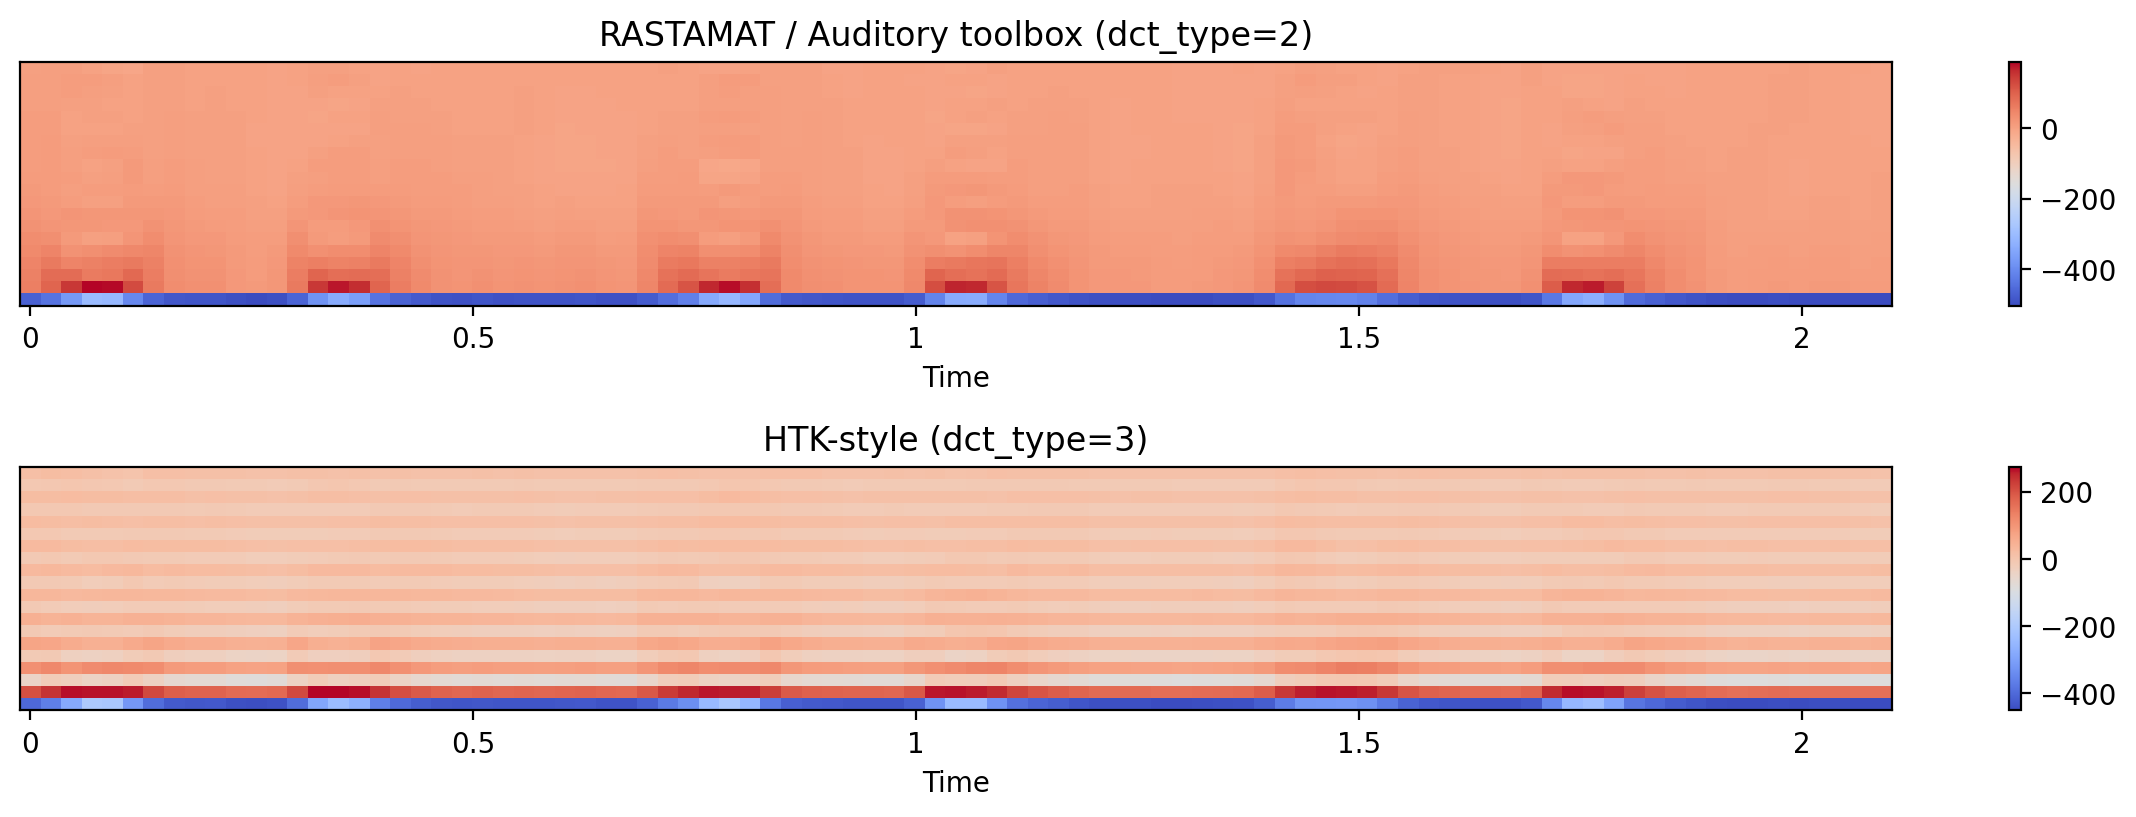

In [ ]:
# Compare different DCT bases
m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Get onset times from a signal
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([0.06965986, 0.11609977, 0.34829932, 0.7662585 , 0.81269841,
       1.06811791, 1.46285714, 1.76471655])

In [ ]:
# use a pre-computed onset envelope
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

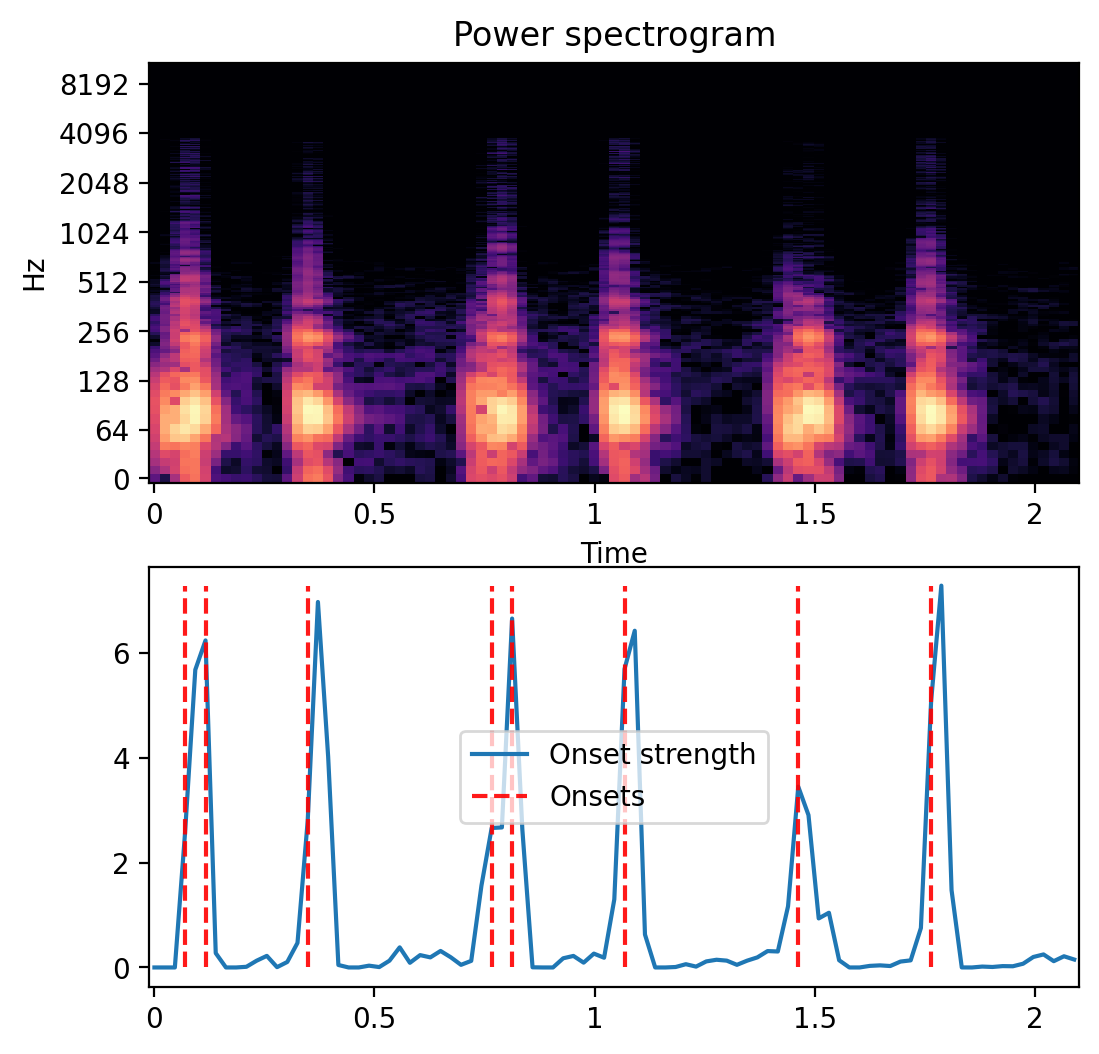

In [ ]:
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

onset_backtrack


In [ ]:
oenv = librosa.onset.onset_strength(y=y, sr=sr)
# Detect events without backtracking
onset_raw = librosa.onset.onset_detect(onset_envelope=oenv, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)
# Backtrack the events using the RMS values
rms = librosa.feature.rms(S=np.abs(librosa.stft(y=y)))
onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])


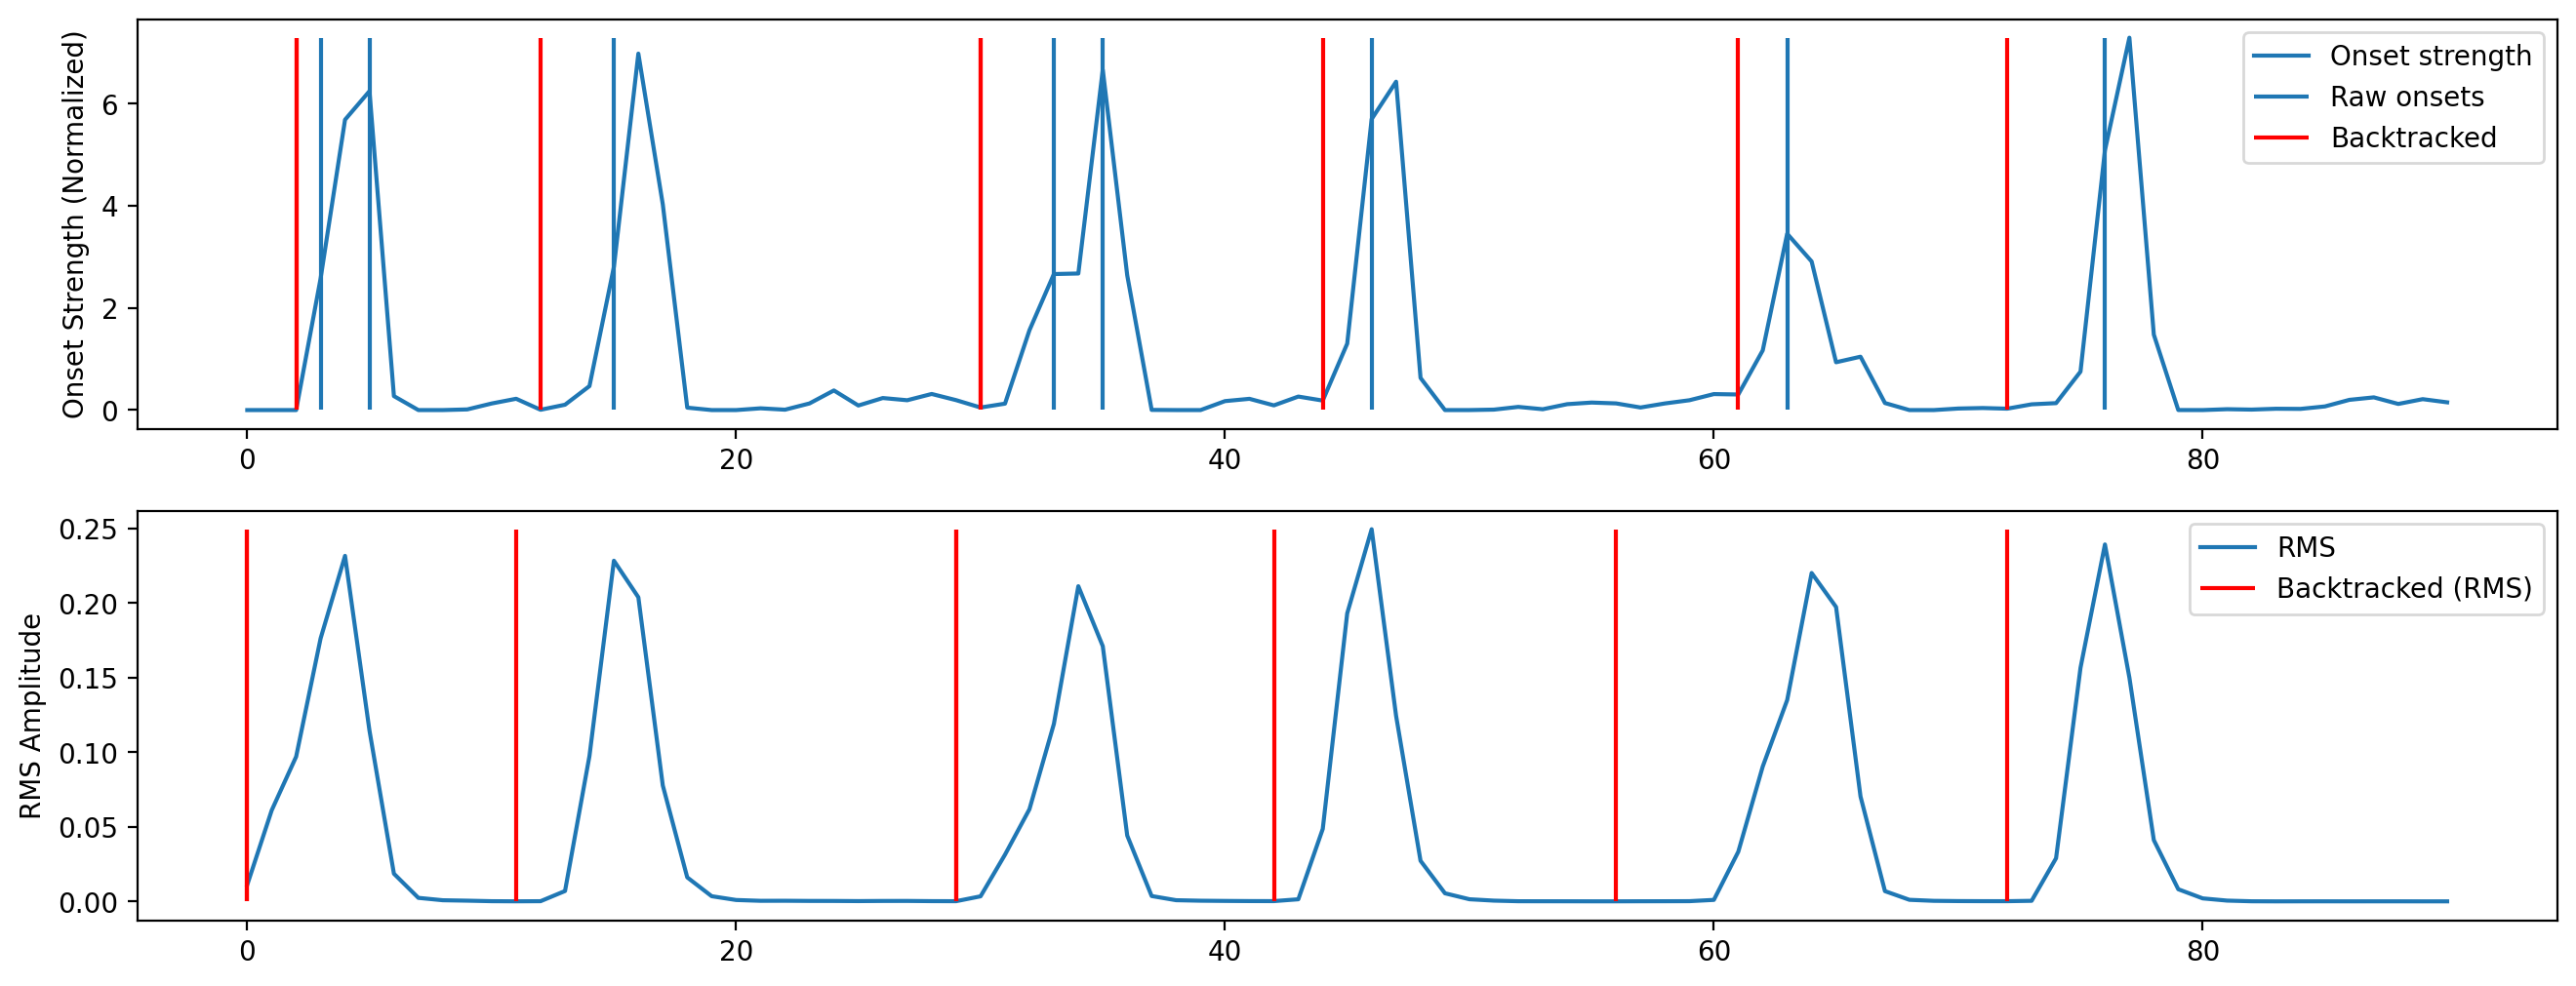

In [ ]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.ylabel("Onset Strength (Normalized)")
plt.plot(oenv, label='Onset strength')
plt.vlines(onset_raw, 0, oenv.max(), label='Raw onsets')
plt.vlines(onset_bt, 0, oenv.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.ylabel("RMS Amplitude")
plt.plot(rms[0], label='RMS')
plt.vlines(onset_bt_rms, 0, rms.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)


onset_strength


Text(0.5, 1.0, 'Sub-band onset strength')

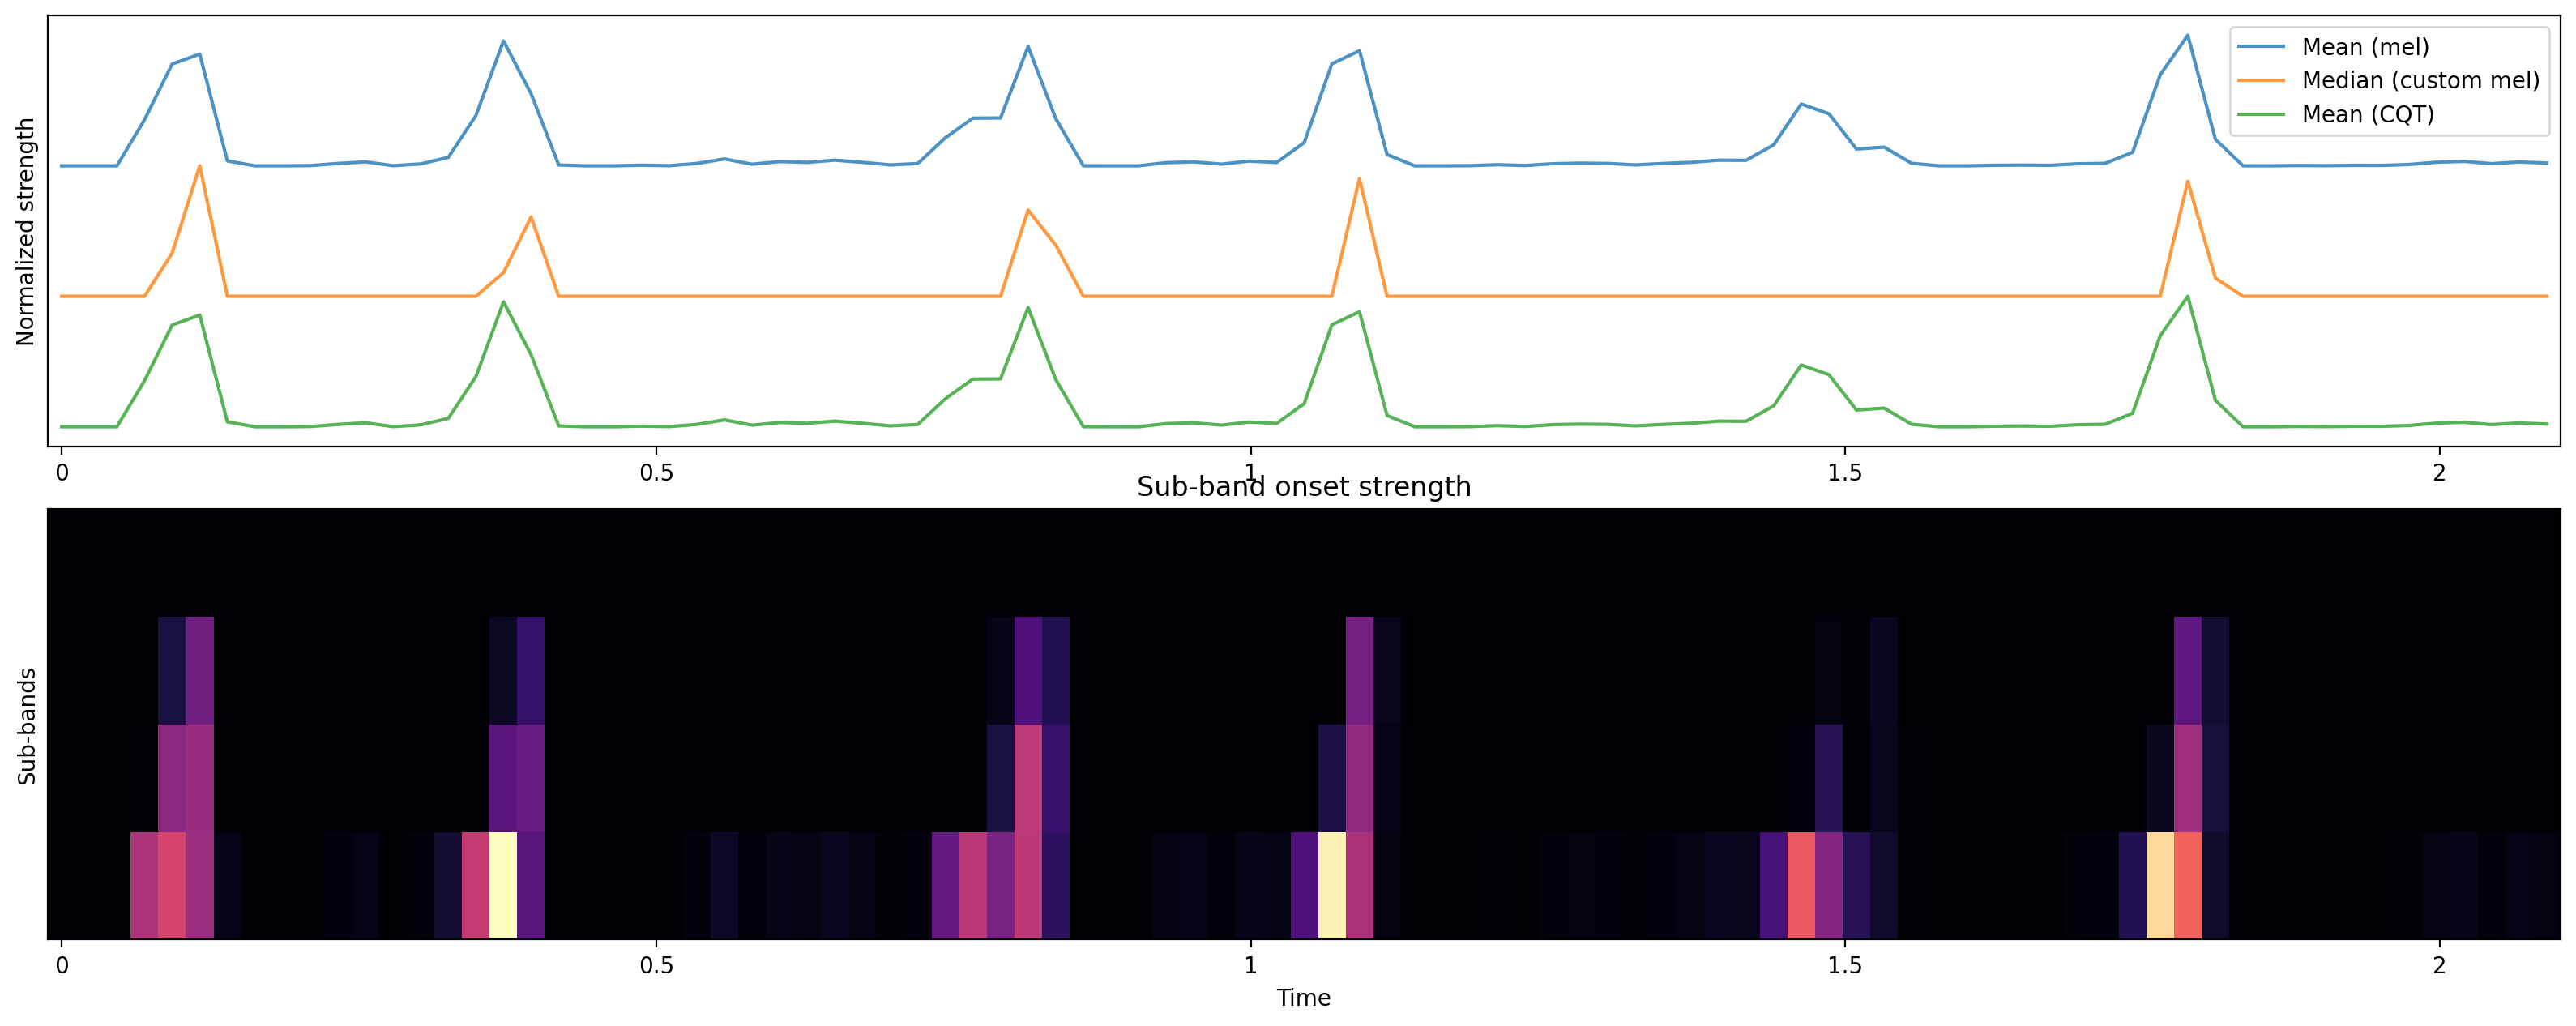

In [ ]:
D = np.abs(librosa.stft(y))
times = librosa.frames_to_time(np.arange(D.shape[1]))

plt.figure(figsize=(16, 6))
#ax1 = plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
#plt.title('Power spectrogram')

# Construct a standard onset function
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
plt.subplot(2, 1, 1, sharex=ax1)
plt.plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,label='Mean (mel)')

# median
onset_env = librosa.onset.onset_strength(y=y, sr=sr,aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times, 1+ (onset_env/onset_env.max()), alpha=0.8,label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env = librosa.onset.onset_strength(y=y, sr=sr)#,feature=librosa.cqt)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

onset_subbands = librosa.onset.onset_strength_multi(y=y, sr=sr, channels=[0, 32, 64, 96, 128])
#plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
librosa.display.specshow(onset_subbands, x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')

visualization of AS_new(aortic stenosis)


duration: 2.6061678004535147
(57466,) 22050


Text(0.5, 1.0, 'Power spectrogram')

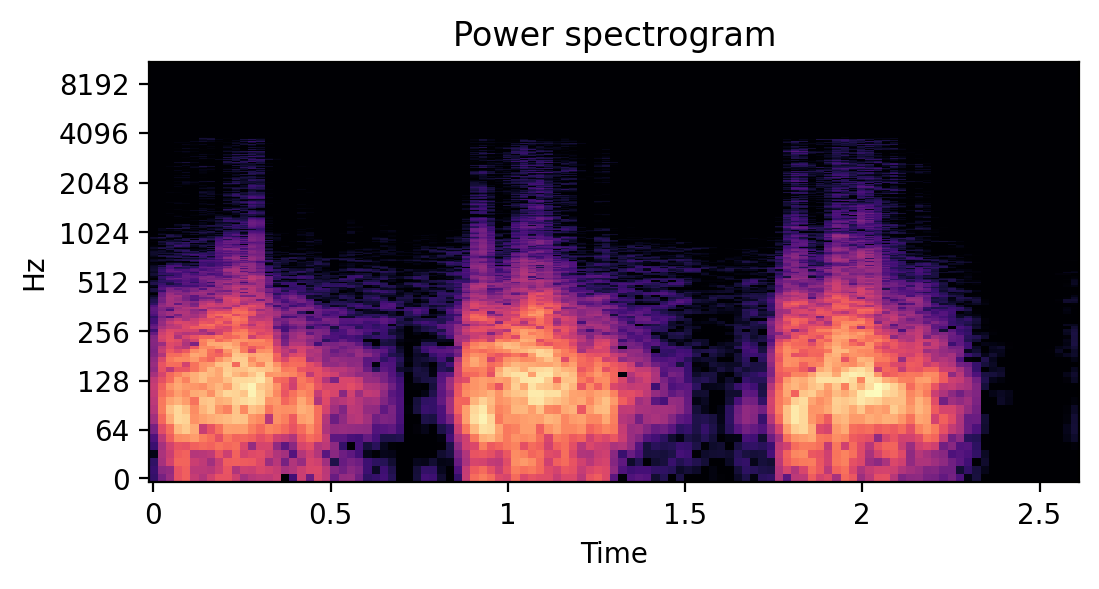

In [ ]:
as_file="./training_dataset/AS_New/New_AS_001.wav"
# Load using Librosa
y, sr = librosa.load(as_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y.shape, sr)
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')



visualization of MR_new(mitral regurgitation)

duration: 2.0994104308390025
(46292,) 22050


Text(0.5, 1.0, 'Power spectrogram')

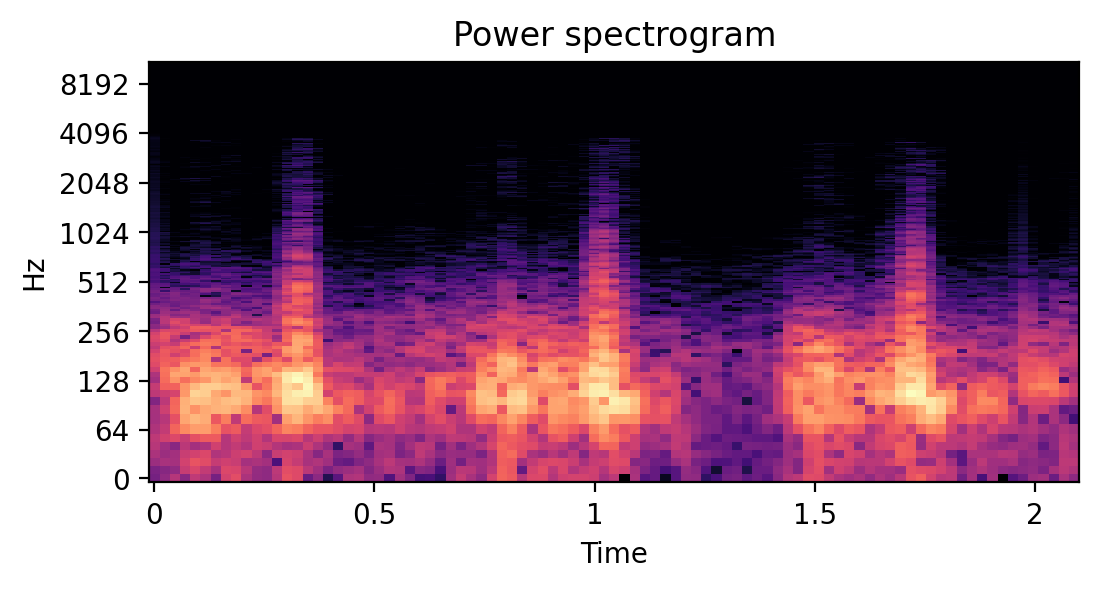

In [ ]:
mr_file="./training_dataset/MR_New/New_MR_001.wav"
# Load using Librosa
y, sr = librosa.load(mr_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y.shape, sr)
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')

visualization of MS_new(mitral stenosis)

duration: 2.95328798185941
(65120,) 22050


Text(0.5, 1.0, 'Power spectrogram')

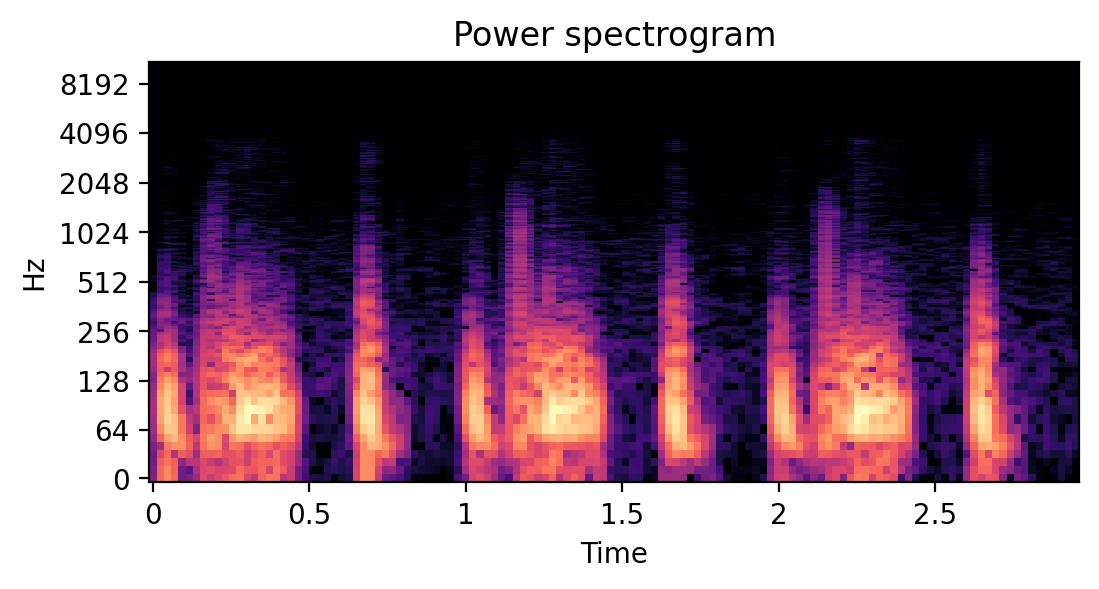

In [ ]:
ms_file="./training_dataset/MS_New/New_MS_001.wav"
# Load using Librosa
y, sr = librosa.load(ms_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y.shape, sr)
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')

visualization of MVP_new(Mitral valve prolapse)

duration: 2.7888888888888888
(61495,) 22050


Text(0.5, 1.0, 'Power spectrogram')

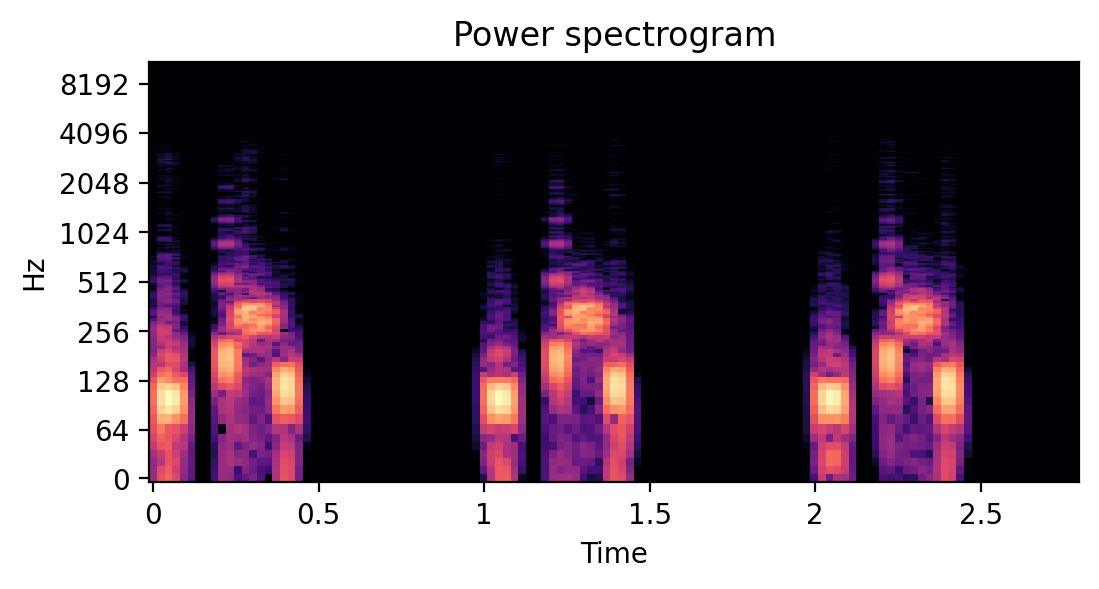

In [ ]:
mvp_file="./training_dataset/MVP_New/New_MVP_001.wav"
# Load using Librosa
y, sr = librosa.load(mvp_file, duration=5)   #default sampling rate is 22 HZ
dur=librosa.get_duration(y=y)
print ("duration:", dur)
print(y.shape, sr)
# visualize it
D = np.abs(librosa.stft(y))
plt.figure(figsize=(6, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram')

creating model for training

In [ ]:
# Utility functions

def audio_to_stft(audio_file):
    data, sample_rate = librosa.load(audio_file, sr=44100)
    stft_data = np.abs(librosa.stft(data))
    return stft_data

In [ ]:
# Collect STFT features and labels

stft_features = []
labels = []
n_frames = 250

for root, dirs, files in os.walk("./training_dataset"):
    for directory in dirs:
        label = os.path.basename(directory)
        category_dir = os.path.join(root, directory)
        for audio_file in os.listdir(category_dir):
            if audio_file.endswith('.wav'):
                labels.append(label)
                audio_path = os.path.join(category_dir, audio_file)
                stft_data = audio_to_stft(audio_path)
                stft_features.append(stft_data)


# Reshape STFT data
new_stft_features = []
for stft_data in stft_features:
    current_frames = stft_data.shape[1]

    if current_frames < n_frames:
        padded_data = np.pad(stft_data, ((0, 0), (0, n_frames - current_frames)), mode='constant')
        new_stft_features.append(padded_data)
    elif current_frames > n_frames:
        trimmed_data = stft_data[:, :n_frames]
        new_stft_features.append(trimmed_data)
    else:
        new_stft_features.append(stft_data)

new_stft_features = np.array(new_stft_features)

In [ ]:
# Convert labels to categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(new_stft_features, labels_categorical, test_size=0.2,
random_state=42)

In [ ]:
X_train.shape

(800, 1025, 250)

In [ ]:
X_test[0]

array([[6.45560846e-02, 1.89335987e-01, 3.26605749e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.96384506e-02, 2.33228445e+00, 5.12721014e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.23377973e-01, 4.77371550e+00, 1.42402077e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.15976223e-04, 1.07236316e-04, 1.09455823e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15975801e-04, 1.08197855e-04, 3.33305564e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15960812e-04, 1.07464199e-04, 8.35895378e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [ ]:
Y_train.shape

(800, 5)

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 1.], dtype=float32)

build lstm model


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
#from tf.keras.utils import np_utils
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [ ]:
print('Build LSTM RNN model ...')
model_lstm = Sequential()
model_lstm.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (1025,250)))
model_lstm.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
#model.add(Dense(len(CLASSES), activation='softmax'))
model_lstm.add(Dense(5, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Build LSTM RNN model ...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1025, 64)          80640     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 93221 (364.14 KB)
Trainable params: 93221 (364.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%time
# saved model checkpoint file
#best_model_file="best_model_trained.hdf5"
#train_model_file=file_path+"/checkpoints/weights.best_{epoch:02d}-{loss:.2f}.hdf5"
MAX_PATIENT=12
MAX_EPOCHS=50
MAX_BATCH=32

# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
#callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
#          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]

print ("training started..... please wait.")
# training
history=model_lstm.fit(X_train, Y_train,
                  batch_size=MAX_BATCH,
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(np.array(X_test), np.array(Y_test)))#,callbacks=callback)

print ("training finised!")
# Evaluate the model
loss, accuracy = model_lstm.evaluate(np.array(X_test), np.array(Y_test))
print("Test Accuracy:", accuracy * 100, "%")

training started..... please wait.


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

NameError: name 'history' is not defined

In [ ]:
# Y_pred=model.predict(X_test)


In [ ]:
for i in range(len(Y_pred)):

  # print(x)
  for p in  range(5):
    if Y_pred[i][p]>=0.5:
      Y_pred[i][p]=1
    else:
      Y_pred[i][p]=0

In [ ]:
# Y_pred[34]

In [ ]:
# def fun(arr):
#   lst=[]
#   for i in range(len(arr)):
#     for j in range(len(arr[i])):
#       if(arr[i][j]==1):
#         lst.append(j)

#   return lst

In [ ]:
# fun(Y_pred)?

In [ ]:
# Y_pred

In [ ]:
Y_test[0]

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, Y_pred)
# cm

In [ ]:
Y_test.shape

In [ ]:
Y_pred.shape

CNN model


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.utils import  plot_model

In [ ]:


num_classes = len(label_encoder.classes_)

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(1025, n_frames, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1023, 248, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 511, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 509, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 254, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 252, 59, 64)       36928     
                                                                 
 flatten (Flatten)           (None, 951552)            0

In [ ]:
filename1 = 'my_model1.png'
plot_model(model, to_file=filename1,show_shapes=True)
# filename1 = 'my_model.png'
print(f"Model plot saved as: {filename1}")

Model plot saved as: my_model1.png


In [ ]:
filename1 = 'my_model.png'
print(f"Model plot saved as: {filename1}")

In [ ]:
# Train the model
history2 = model.fit(
    np.array(X_train),
    np.array(Y_train),
    epochs=20, batch_size=50,
    validation_data=(np.array(X_test), np.array(Y_test))
    )

# Evaluate the model
loss, accuracy = model.evaluate(np.array(X_test), np.array(Y_test))
print("Test Accuracy:", accuracy * 100, "%")

Epoch 1/20
16/16 [==============================] - 20s 375ms/step - loss: 1.0716 - accuracy: 0.7312 - val_loss: 0.1983 - val_accuracy: 0.9200
Epoch 2/20
16/16 [==============================] - 5s 327ms/step - loss: 0.0893 - accuracy: 0.9712 - val_loss: 0.0972 - val_accuracy: 0.9900
Epoch 3/20
16/16 [==============================] - 5s 315ms/step - loss: 0.0179 - accuracy: 0.9962 - val_loss: 0.1346 - val_accuracy: 0.9900
Epoch 4/20
16/16 [==============================] - 5s 310ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0234 - val_accuracy: 0.9950
Epoch 5/20
16/16 [==============================] - 5s 316ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9900
Epoch 6/20
16/16 [==============================] - 5s 307ms/step - loss: 0.0731 - accuracy: 0.9887 - val_loss: 0.1059 - val_accuracy: 0.9700
Epoch 7/20
16/16 [==============================] - 5s 328ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0457 - val_accuracy: 0.9750
Epoch

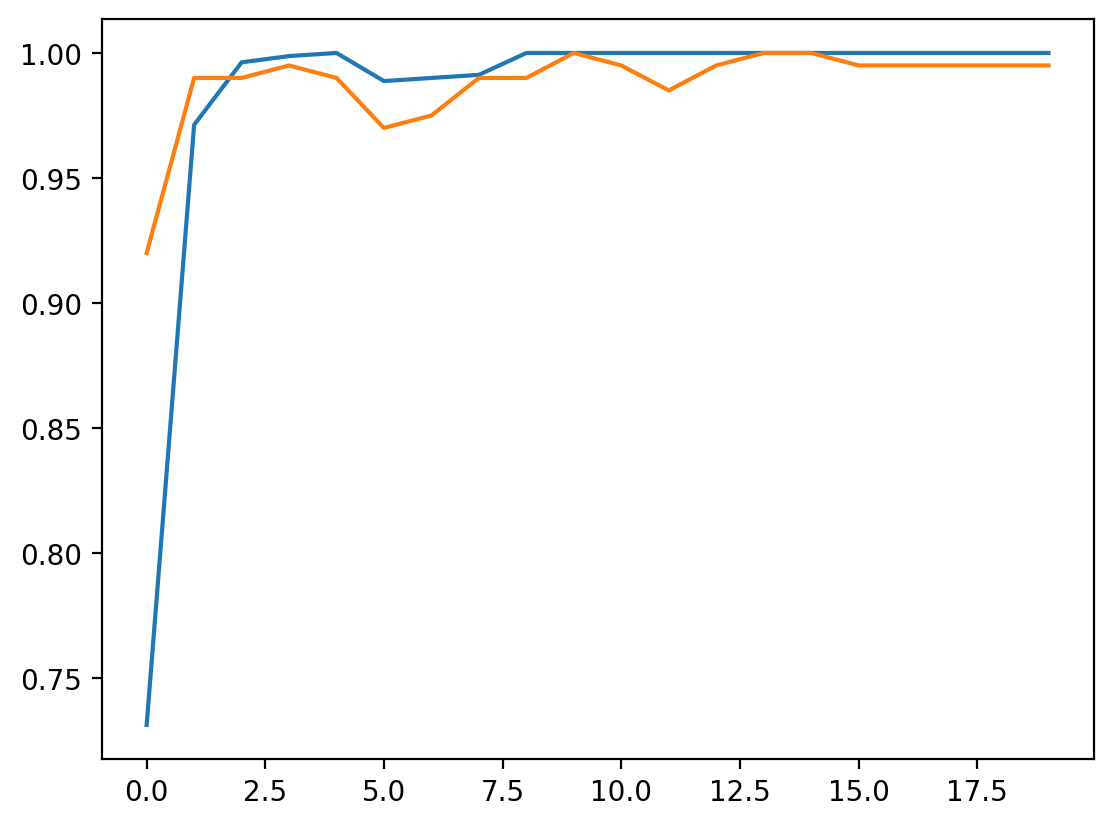

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

<Figure size 2200x1000 with 0 Axes>

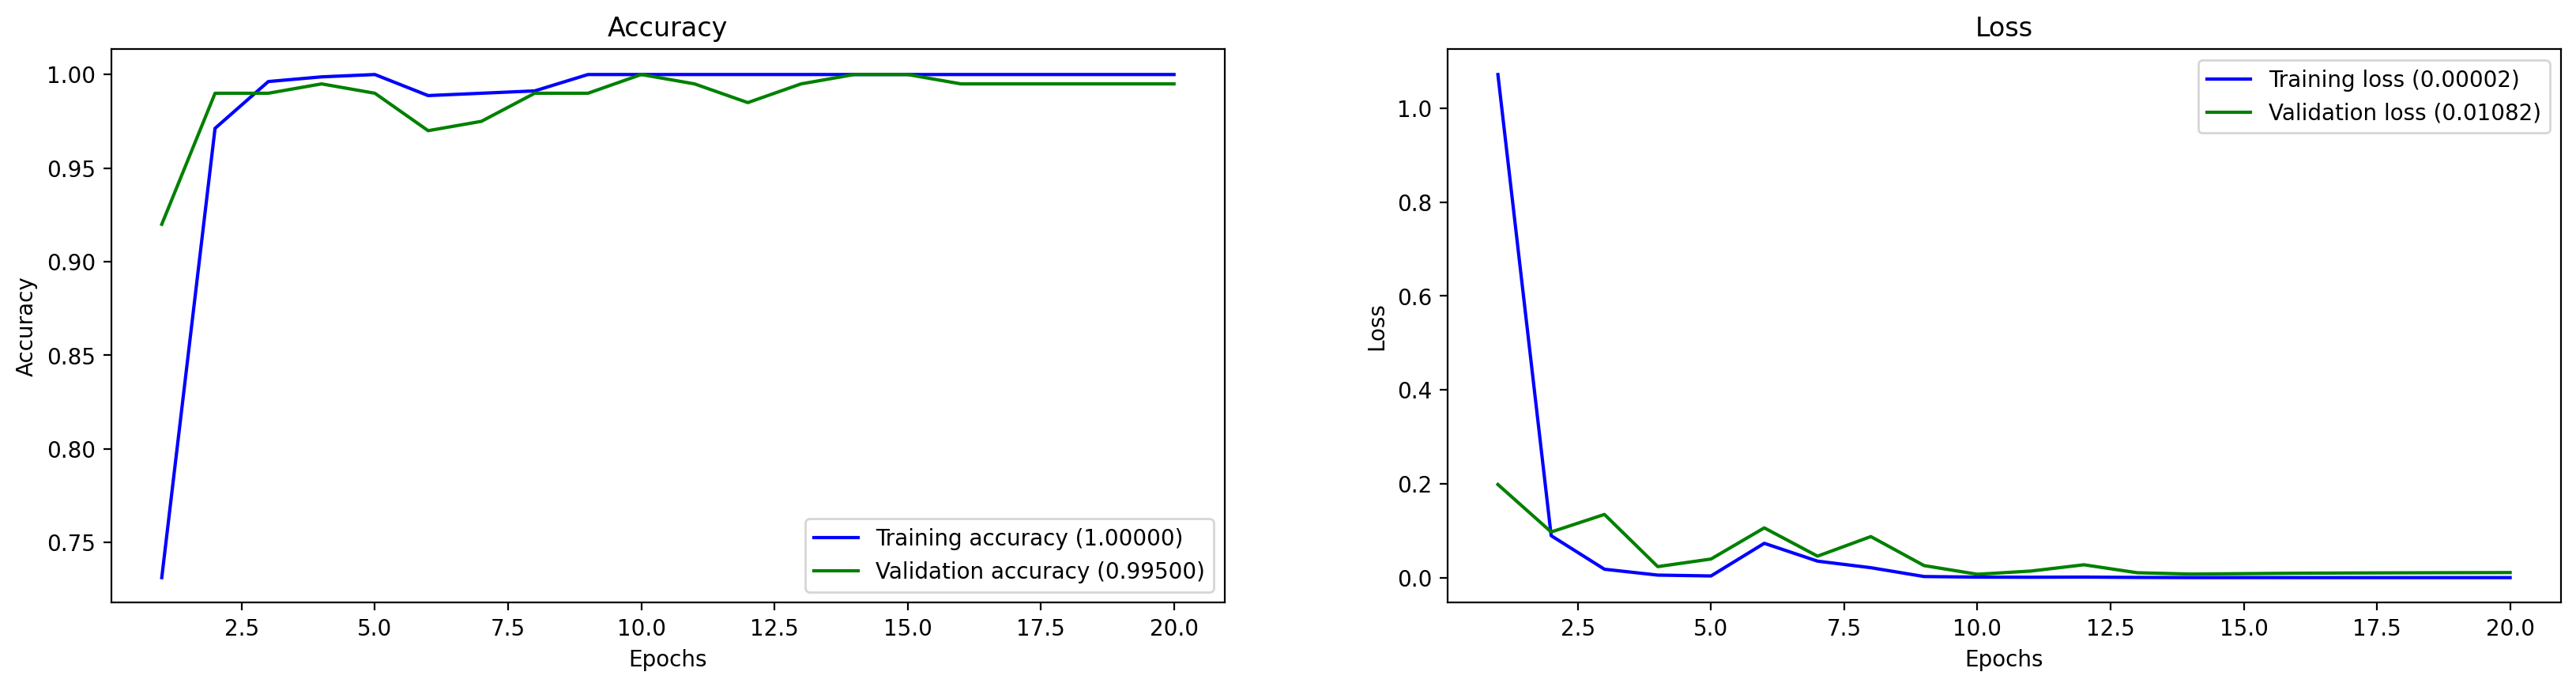

In [ ]:
plot_history(history2)

In [ ]:
Y_pred=model.predict(X_test)

7/7 [==============================] - 2s 314ms/step


In [ ]:
Y_pred[0]

In [ ]:
Y_test[0]

classic models

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
len(X_test)

In [ ]:
X_train_reshaped =X_train.reshape(X_train.shape[0], -1, X_train.shape[2])

In [ ]:
print(X_train_reshaped.shape)

(800, 1025, 250)


In [ ]:
#modifyn train data
new_X_train=[]
for i in range(len(X_train)):
  lst=[]
  for j in range(1025):
    lst.extend(X_train[i][j])
  new_X_train.append(lst)


In [ ]:
new_X_test=[]
for i in range(len(X_test)):
  lst=[]
  for j in range(1025):
    lst.extend(X_test[i][j])
  new_X_test.append(lst)


In [ ]:
# len(new_X_train)
new_X_train=np.array(new_X_train)
new_X_train.shape

(800, 256250)

In [ ]:
new_X_test=np.array(new_X_test)
new_X_test.shape

(200, 256250)

In [ ]:
len(Y_label_train)

NameError: name 'Y_label_train' is not defined

In [ ]:
#lebel modifing
# Y_label_test=[]
# for i in range(len(Y_test)):
#   for j in range(5):
#     if(Y_test[i][j]==1):
#       Y_label_test.append(j)
# print(Y_label_test[6])

3


In [ ]:
#lebel modifing
# Y_label_train=[]
# for i in range(len(Y_train)):
#   for j in range(5):
#     if(Y_train[i][j]==1):
#       Y_label_train.append(j)
# print(Y_label_train[6])

2


In [ ]:
# #lebel modifing
# Y_label_test=[]
# for i in range(len(Y_test)):
#   for j in range(5):
#     if(Y_train[i][j]==1):
#       Y_label_test.append(j)
# print(Y_label_test[6])

2


In [ ]:
# len(Y_label_test)

200

In [ ]:
# for i in range(10):
#   print(Y_label_train[i])

2
4
3
4
1
4
2
1
4
1


In [ ]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix

# logreg = SVC()
# logreg.fit(new_X_train, Y_label_train)
# y_predict_train_logreg = logreg.predict(new_X_train)
# y_predict_test_logreg = logreg.predict(new_X_test)

# train_accuracy_score_logreg = accuracy_score(Y_label_train, y_predict_train_logreg)
# test_accuracy_score_logreg = accuracy_score(Y_label_test, y_predict_test_logreg)

# print(train_accuracy_score_logreg)
# print(test_accuracy_score_logreg)

0.97625
0.165


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100)
# clf.fit(new_X_train, Y_label_train)
# y_predict_train_logreg2 = logreg.predict(new_X_train)
# y_predict_test_logreg2 = logreg.predict(new_X_test)

# train_accuracy_score_logreg2 = accuracy_score(Y_label_train, y_predict_train_logreg2)
# test_accuracy_score_logreg2 = accuracy_score(Y_label_test, y_predict_test_logreg2)

# print(train_accuracy_score_logreg2)
# print(test_accuracy_score_logreg2)


KeyboardInterrupt: 

attention model


In [ ]:
import re
import nltk
import string
import spacy

import numpy as np
import pandas as pd
from spacy import displacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer

from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.metrics import Precision, Recall
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Attention
from keras.layers import Concatenate, Dense, Input
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer

from keras import Model
from keras.layers import Layer
from keras.utils import plot_model

import keras.backend as K

import matplotlib.pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

def lstm_model(input_len, max_features=10000, embed_size=128):
    model = Sequential()
    model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (1025,250)))
    #model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
    model.add(attention())
    model.add(Dense(5, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    return model

In [ ]:
model_att = lstm_model(input_len=40, max_features=10000, embed_size=128)
model_att.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1025, 64)          80640     
                                                                 
 attention (attention)       (None, 64)                1089      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 82054 (320.52 KB)
Trainable params: 82054 (320.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


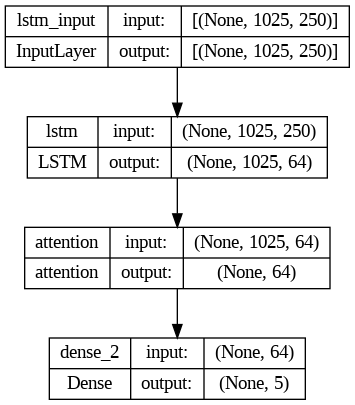

In [ ]:
filename2 = 'my_model2.png'
plot_model(model_att, to_file=filename2, show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [ ]:
history=model_att.fit(X_train, Y_train,
                  batch_size=32,
                  epochs=20,
                  verbose=1,
                  validation_data=(np.array(X_test), np.array(Y_test)))

Epoch 1/20
25/25 [==============================] - 40s 2s/step - loss: 0.5324 - accuracy: 0.3338 - val_loss: 0.4722 - val_accuracy: 0.6700
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8025

KeyboardInterrupt: 

In [ ]:
%%time
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.82 µs


In [ ]:
# plot history
plot_history(history)

In [ ]:
# Feature Extraction from attention lstm model

# Extract
feat_extract = Model(
    inputs=model_att.inputs,
    outputs=model_att.layers[-2].output
)

# Predict the features
feat_train = feat_extract.predict(X_train)
feat_test = feat_extract.predict(X_test)
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier


# Model with different ensemble methods
ensemble_methods = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, random_state=42)
}


from sklearn.metrics import accuracy_score, f1_score
# Model and predict using different ensemble methods
for method in ensemble_methods:
    print(f"Using {method}:")
    ensemble_methods[method].fit(feat_train, Y_train)

    method_predict = ensemble_methods[method].predict(feat_test)
    accuracy = accuracy_score(Y_test, method_predict)
    f1 = f1_score(Y_test, method_predict, average='weighted')
    print(f"Accuracy using {method} = {accuracy * 100}%")
    print(f"F1 score using {method} = {f1}")

7/7 [==============================] - 2s 282ms/step
Using Random Forest Classifier:
Accuracy using Random Forest Classifier = 90.5%
F1 score using Random Forest Classifier = 0.9352453207607696
Using Extra Trees Classifier:
Accuracy using Extra Trees Classifier = 93.5%
F1 score using Extra Trees Classifier = 0.9637287160683121


In [ ]:
for method in ensemble_methods:
  plot_model(ensemble_methods[method],show_shapes=True)

AttributeError: 'RandomForestClassifier' object has no attribute 'built'

In [ ]:
# Feature Extraction from cnn model
from keras import Model
# Extract
feat_extract = Model(
    inputs=model.inputs,
    outputs=model.layers[-2].output
)

# Predict the features
feat_train = feat_extract.predict(X_train)
feat_test = feat_extract.predict(X_test)
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier


# Model with different ensemble methods
ensemble_methods = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, random_state=42)
}


from sklearn.metrics import accuracy_score, f1_score
# Model and predict using different ensemble methods
for method in ensemble_methods:
    print(f"Using {method}:")
    ensemble_methods[method].fit(feat_train, Y_train)

    method_predict = ensemble_methods[method].predict(feat_test)
    accuracy = accuracy_score(Y_test, method_predict)
    f1 = f1_score(Y_test, method_predict, average='weighted')
    print(f"Accuracy using {method} = {accuracy * 100}%")
    print(f"F1 score using {method} = {f1}")

7/7 [==============================] - 2s 295ms/step
Using Random Forest Classifier:
Accuracy using Random Forest Classifier = 98.0%
F1 score using Random Forest Classifier = 0.9823434373465966
Using Extra Trees Classifier:
Accuracy using Extra Trees Classifier = 99.0%
F1 score using Extra Trees Classifier = 0.9900849898580123
